# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

In [8]:
!pip uninstall numpy

Lo primero, vemos la imagen que vamos a comprimir:

In [3]:
!pip install pooch
!pip install numpy
!pip install scipy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/b1/3e/e28f4c1dd9e042eb57a3eb652f200225e311b608632bc727ae378623d4f8/numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB 330.3 kB/s eta 0:00:39
   ---------------------------------------- 0.1/12.7 MB 991.0 kB/s eta 0:00:13
   - -------------------------------------- 0.4/12.7 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/12.7 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.7 MB 4.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/12.7 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.5/12.7 MB 5.1 MB/s eta 0:00:03
   ------ --------------------------------- 1.9/12.7 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/ea/b5/29fece1a74c6a94247f8a6fb93f5b28b533338e9c34fdcc9cfe7a939a767/scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata
  Using cached scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.4 MB 640.0 kB/s eta 0:01:01
   ---------------------------------------- 0.1/38.4 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.4 MB 3.0 MB/s eta 0:00:13
   ---------------------------------------- 0.5/38.4 MB 2.9 MB/s eta 0:00:13
    --------------------------------------- 0.7/38.4 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.0/38.4 MB 3.9 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.4 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.4/38.4 MB 4.0 MB/s eta 0:00:10
   - -------------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b1/79/0d1c165eac44405a86478082e225fce87874f7198300bbebc55faaf6d28d/matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/01/c8/fadd0b92ffa7b5eb5949bf340a63a4a496a6930a6c37a7ba0f12acb076d6/contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/0e/4d/1eaaad22781d55f49d1b184563842172aeb6a4fe53c029e503be81114314/fonttools-4.58.5-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/109.0 kB ? eta 


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


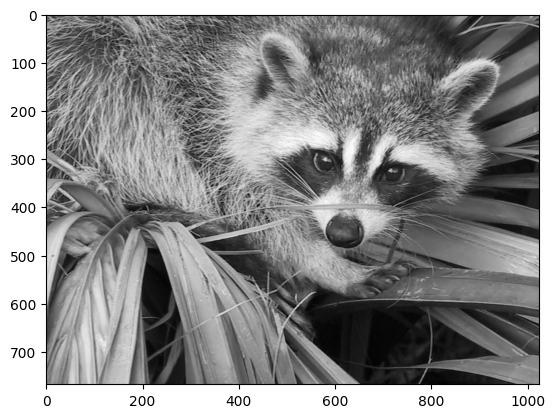

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import datasets
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [5]:
A

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]],
      shape=(768, 1024), dtype=uint8)

In [6]:
type(A)

numpy.ndarray

In [10]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/68/c7/4e956281a077f4835458c3f9656c666300282d5199039f26d9de1dabd9be/scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB 640.0 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.7 MB 1.1 MB/s eta 0:00:11
  


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [7]:
import numpy as np

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])

def sse_score(X, X_hat):
    # TODO define el error
    return np.sum((X - X_hat) ** 2)
sse = sse_score(X, X_hat)  
print(sse)


0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [32]:
import numpy as np
from scipy.linalg import svd

X = np.array([[1, 2], [3, 4]])

def SVD(x):
    U, s, Vt = svd(x, full_matrices=False) # TODO Define la función
    return U, s, Vt   # S es una matriz diagonal

U,s,Vt = SVD(X)

S = np.diag(s)

print("U:\n", U)
print("S (diagonal):\n", S)
print("Vt:\n", Vt)

U:
 [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
S (diagonal):
 [[5.4649857  0.        ]
 [0.         0.36596619]]
Vt:
 [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [33]:
def reconstruction(U, S, Vt):
    # TODO Define la función
    X_hat = np.dot(U, np.dot(S, Vt))
    return X_hat
U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
reconstruction(U,S,Vt)
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [34]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715304986234458e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [35]:
A = datasets.face(gray=True)
U,s,Vt = SVD(A)
S = np.diag(s)

print("U:\n", U)
print("S (diagonal):\n", S)
print("Vt:\n", Vt)



U:
 [[ 3.1780481e-02  1.8994940e-02  1.7676966e-02 ... -5.0314525e-06
  -2.2679998e-02 -5.1952880e-03]
 [ 3.1889021e-02  1.7726608e-02  1.6094264e-02 ... -4.9385047e-03
   5.8035925e-02 -6.9567759e-04]
 [ 3.2730993e-02  1.2303174e-02  1.2282133e-02 ... -9.8284306e-03
  -6.0665429e-02  3.3543932e-03]
 ...
 [ 3.0345839e-02 -3.6416531e-02  2.4997117e-03 ... -6.3170828e-02
  -6.9764838e-02  8.4677361e-02]
 [ 3.0113289e-02 -3.5544705e-02  4.8351826e-04 ...  5.3087249e-02
   7.4803554e-02 -4.0475905e-02]
 [ 3.0015035e-02 -3.4644201e-02 -8.7496446e-04 ... -2.4792869e-02
  -3.2693937e-02  3.6865817e-03]]
S (diagonal):
 [[1.0320173e+05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.1610234e+04 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.6063792e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0875809e+00
  0.0000000e+00 0.0000000e+00]
 [0.

In [39]:
reconstruction(U,S,Vt)
A_hat = reconstruction(U,S,Vt)
A_hat

array([[113.99993 , 129.99973 , 144.99977 , ..., 119.00036 , 128.99998 ,
        137.00009 ],
       [ 82.98914 , 104.00511 , 123.02845 , ..., 117.998184, 133.99905 ,
        145.99948 ],
       [ 67.99855 ,  87.99794 , 108.99882 , ..., 119.000725, 134.00037 ,
        145.00067 ],
       ...,
       [ 97.998314, 103.00037 , 115.99898 , ..., 143.99887 , 143.0006  ,
        142.99953 ],
       [ 93.99964 , 103.999954, 119.998985, ..., 143.00061 , 141.99916 ,
        142.00015 ],
       [ 94.000755, 106.00104 , 118.99954 , ..., 141.99918 , 140.99991 ,
        139.99951 ]], shape=(768, 1024), dtype=float32)

In [59]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción
A = datasets.face(gray=True)

def image_compression(a, n_comp):
    # TODO 1: Aplicar SVD (usando la función que hemos creado)
    U,s,Vt = SVD(a)
    S = np.diag(s)
    #return U, S, Vt
    U_k = U[:, :n_comp]
    S_k = np.diag(s[:n_comp])
    Vt_k = Vt[:n_comp, :]

    
    # TODO 2: Reconstruir usando solo el número de componentes n_comp (usando la función que hemos creado)
    a_hat = reconstruction(U_k,S_k,Vt_k)
    
    # TODO 3: Calcular el error
    sse = sse_score(a, a_hat)
    print(f"El error de reconstrucción es: {sse}")
    
    # return a_hat, sse # A_hat es la matriz comprimida y sse es su error respecto de A
    return sse, a_hat
    print(f"El error de reconstrucción con {n_comp} componentes es: {sse}")
image_compression(A, 50000)



El error de reconstrucción es: 0.14507494866847992


(np.float32(0.14507495),
 array([[113.99993 , 129.99973 , 144.99977 , ..., 119.00036 , 128.99998 ,
         137.00009 ],
        [ 82.98914 , 104.00511 , 123.02845 , ..., 117.998184, 133.99905 ,
         145.99948 ],
        [ 67.99855 ,  87.99794 , 108.99882 , ..., 119.000725, 134.00037 ,
         145.00067 ],
        ...,
        [ 97.998314, 103.00037 , 115.99898 , ..., 143.99887 , 143.0006  ,
         142.99953 ],
        [ 93.99964 , 103.999954, 119.998985, ..., 143.00061 , 141.99916 ,
         142.00015 ],
        [ 94.000755, 106.00104 , 118.99954 , ..., 141.99918 , 140.99991 ,
         139.99951 ]], shape=(768, 1024), dtype=float32))

In [61]:
racoon = datasets.face(gray=True)
sse_racoon, racoon_hat = image_compression(racoon, 50)
print(sse_racoon)
print(racoon_hat)


El error de reconstrucción es: 195489952.0
1.9548995e+08
[[102.0088   107.754814 114.71975  ... 149.68887  151.21805  152.32536 ]
 [101.181854 107.63219  116.217896 ... 137.7686   139.70734  141.13109 ]
 [ 98.273926 104.70616  110.28463  ... 127.86634  129.3044   130.4859  ]
 ...
 [101.6946   102.868904 111.35961  ... 140.32516  141.34375  141.7923  ]
 [ 98.47756  100.315254 109.86708  ... 139.23822  140.53854  141.15819 ]
 [ 95.52709   97.59237  107.66734  ... 138.0435   139.4757   140.17953 ]]


### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`. Si quieres, también puedes incluir gráficas del error.

El error de reconstrucción es: 0.14507494866847992


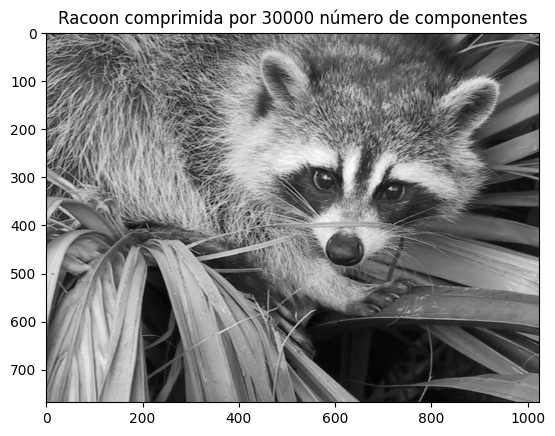

In [71]:
import matplotlib.pyplot as plt
# TODO Dibuja las graficas

# 1 Crear gráfica con plt.figure()
plt.imshow(racoon, cmap=plt.cm.gray)

# 2 Elegir un n_comp y aplicar la función image_compression()
n_comp = 30000
sse_racoon, racoon_hat = image_compression(racoon, n_comp)

# 3 Usar plt.imshow(A_hat, cmap=plt.cm.gray), donde A_hat va a ser la matriz comprimida resultante del paso anterior
plt.imshow(racoon_hat, cmap=plt.cm.gray)

# 4 Añadir un título a la gráfica

plt.title(f"Racoon comprimida por {n_comp} número de componentes")

plt.show()
# Repetir para distintas compresiones (distinto n_comp)